# Internet usage analysis

# The data

## The research team compiled the following tables (source):
* internet
"Entity" - The name of the country, region, or group.
"Code" - Unique id for the country (null for other entities).
"Year" - Year from 1990 to 2019.
"Internet_usage" - The share of the entity's population who have used the internet in the last three months.
* people
"Entity" - The name of the country, region, or group.
"Code" - Unique id for the country (null for other entities).
"Year" - Year from 1990 to 2020.
"Users" - The number of people who have used the internet in the last three months for that country, region, or group.
* broadband
"Entity" - The name of the country, region, or group.
"Code" - Unique id for the country (null for other entities).
"Year" - Year from 1998 to 2020.
"Broadband_Subscriptions" - The number of fixed subscriptions to high-speed internet at downstream speeds >= 256 kbit/s for that country, region, or group.

In [156]:
# Import all necessary packages for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

sns.set_style("darkgrid")
# Set the display format for float numbers
pd.options.display.float_format = '{:.0f}'.format

In [157]:
# Reading the data
broadband = pd.read_csv('data/broadband-by-country.csv')
users = pd.read_csv('data/number-of-internet-users.csv')
percentage_of_users = pd.read_csv('data/share-of-individuals-using-the-internet.csv')

In [158]:
# Checking data for broadband
broadband.head()

,Entity,Code,Year,broadband_subscriptions_(per 100 people)
0,Afghanistan,AFG,2004,0
1,Afghanistan,AFG,2005,0
2,Afghanistan,AFG,2006,0
3,Afghanistan,AFG,2007,0
4,Afghanistan,AFG,2008,0


In [159]:
# Checking data for users
users.head()

,Entity,Code,Year,Number_of_users
0,Afghanistan,AFG,1990,0
1,Afghanistan,AFG,1991,0
2,Afghanistan,AFG,1992,0
3,Afghanistan,AFG,1993,0
4,Afghanistan,AFG,1994,0


In [160]:
# Checking data for percentage_of_users
percentage_of_users.head()

,Entity,Code,Year,Individuals_%_of_population
0,Afghanistan,AFG,1990,0
1,Afghanistan,AFG,1991,0
2,Afghanistan,AFG,1992,0
3,Afghanistan,AFG,1993,0
4,Afghanistan,AFG,1994,0


# Now, I will conduct some common data cleaning tasks that must be performed before starting data analysis.

In [161]:
# Checking data types for all dataframes

broadband.dtypes

Entity                                        object
Code                                          object
Year                                           int64
 broadband_subscriptions_(per 100 people)    float64
dtype: object

In [162]:
# Checking data types for all dataframes

users.dtypes

Entity             object
Code               object
Year                int64
Number_of_users     int64
dtype: object

In [163]:
# Checking data types for all dataframes

percentage_of_users.dtypes

Entity                          object
Code                            object
Year                             int64
Individuals_%_of_population    float64
dtype: object

In [164]:
# Checking all null values

broadband.isna().sum()

Entity                                         0
Code                                         271
Year                                           0
 broadband_subscriptions_(per 100 people)      0
dtype: int64

In [165]:
# Checking all null values

users.isna().sum()

Entity               0
Code               307
Year                 0
Number_of_users      0
dtype: int64

In [166]:
# Checking all null values

percentage_of_users.isna().sum()

Entity                           0
Code                           434
Year                             0
Individuals_%_of_population      0
dtype: int64

# What are the top 10 countries with the highest internet use (by population share) in 2020?

In [167]:
# Subsetting data frame for 2020
question_1 = percentage_of_users[percentage_of_users['Year'] == 2020]

In [168]:
# create a sample dataframe
top_10 = question_1.nlargest(10, "Individuals_%_of_population")[["Entity", "Individuals_%_of_population"]]

In [169]:
top_10

,Entity,Individuals_%_of_population
6141,United Arab Emirates,100
416,Bahrain,100
4852,Qatar,100
3092,Kuwait,99
2668,Iceland,99
3502,Luxembourg,99
5141,Saudi Arabia,98
4480,Norway,97
997,Canada,97
1504,Denmark,97


In [170]:
# Creating a function that will show top 10 values in sample dataset

def plot_bar_chart_top10(dataframe, x, y, xlabel, ylabel, title, figsize=(15,8)) -> None:
    """
    Plot a bar chart using seaborn.
    
    Parameters:
        dataframe (pandas.DataFrame): The data to be plotted.
        x (str): The name of the column to be used for the x-axis.
        y (str): The name of the column to be used for the y-axis.
        xlabel (str): The label for the x-axis.
        ylabel (str): The label for the y-axis.
        title (str): The title of the plot.
        figsize (tuple, optional): The size of the figure. Defaults to (15,8).

    Returns:
        None.
    """
    
    # create a figure and an axis object
    fig, ax = plt.subplots(figsize=figsize)
    
    # create the bar plot
    sns.barplot(x=x, y=y, data=dataframe, palette=[ "#4361EE" if i < 3 else "#4CC9F0" for i in range(len(dataframe))], ax=ax)
    
    # show the values as integers with padding
    for i, v in enumerate(dataframe[y]):
        ax.text(i, v+0.9, f'{str(int(v))}%', color='black', ha="center", fontsize = 12)
    
    # set x-axis label and rotate x-axis tick labels
    ax.set_xlabel(xlabel)
    plt.xticks(rotation=45, ha='right')
    
    # set y-axis label
    ax.set_ylabel(ylabel)
    
    # set plot title
    plt.title(title, fontsize=16)
    
    # show the plot
    plt.show()

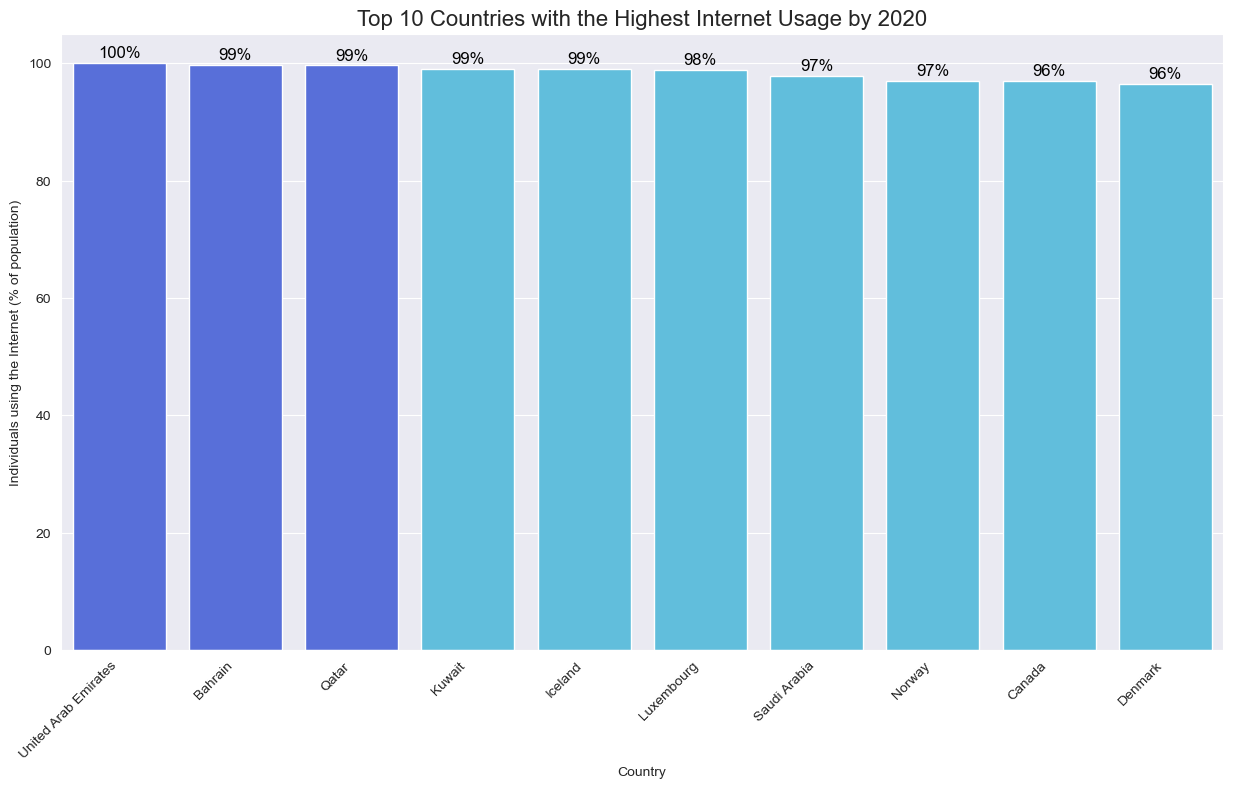

In [171]:
plot_bar_chart_top10(top_10, "Entity", "Individuals_%_of_population", "Country", "Individuals using the Internet (% of population)", "Top 10 Countries with the Highest Internet Usage by 2020")

On barplot, I have created a dependency between countries and a high level of Internet. Highlighted the 3 most developed countries in dark blue.
We see that the UAE is the leader in the number of people who have a high level of Internet, there are more than 9 million people in it. Next comes Bahrain with a population of more than 5.5 million.

Also for better understanding of our data we can see how it has changed over 5 year period. 

In [203]:
data2015 = users.query('Year>=2015 and Number_of_users>=90')\
				.groupby(['Entity'])\
    			.agg({'Number_of_users':'mean'})\
        		.sort_values('Number_of_users')\
				.reset_index()

data2015_top10 = data2015.nlargest(10, "Number_of_users")[["Entity", "Number_of_users"]]

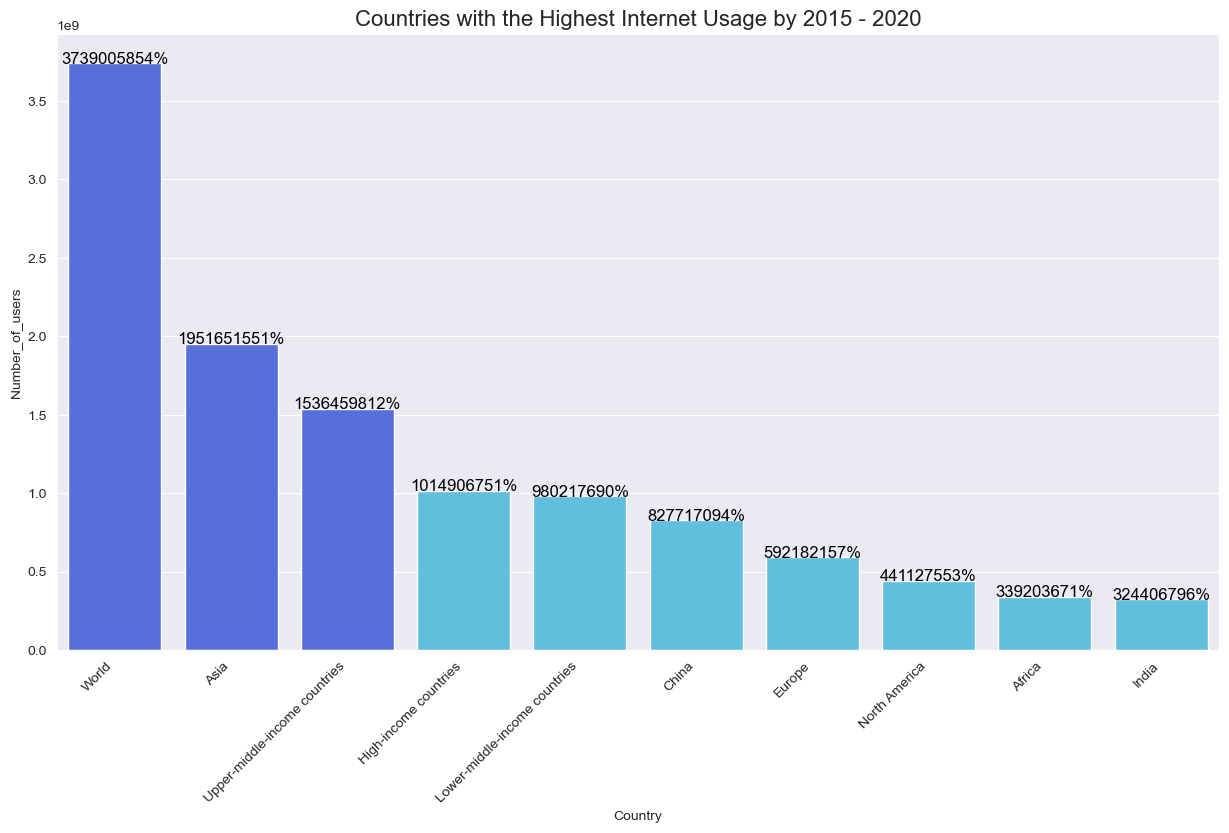

In [204]:
plot_bar_chart_top10(data2015_top10 , "Entity", "Number_of_users", "Country", "Number_of_users", "Countries with the Highest Internet Usage by 2015 - 2020")

In [173]:
data2015

,Entity,Number_of_users
0,Tuvalu,3389
1,Nauru,7304
2,Marshall Islands,14068
3,San Marino,20511
4,British Virgin Islands,23252
...,...,...
212,Lower-middle-income countries,980217690
213,High-income countries,1014906751
214,Upper-middle-income countries,1536459812
215,Asia,1951651551


In [174]:
# smallest_10 = question_1.nsmallest(10, "Individuals_%_of_population")[["Entity", "Individuals_%_of_population"]].set_index('Entity')
smallest_10 = question_1.nsmallest(10, "Individuals_%_of_population")[["Entity", "Individuals_%_of_population"]]

# What are the top 10 countries with the lowest internet use (by population share) in 2020?

In [175]:
# Creating a function that will show lowest 10 values in sample dataset

def plot_smallest_10_bar_chart(dataframe, x, y, xlabel, ylabel, title, figsize=(15,8)):
    """
    Plot a bar chart using seaborn.

    Parameters:
        dataframe (pandas.DataFrame): The data to be plotted.
        x (str): The name of the column to be used for the x-axis.
        y (str): The name of the column to be used for the y-axis.
        xlabel (str): The label for the x-axis.
        ylabel (str): The label for the y-axis.
        title (str): The title of the plot.
        figsize (tuple, optional): The size of the figure. Defaults to (15,8).

    Returns:
        None.
    """
    
    # create a figure and an axis object
    fig, ax = plt.subplots(figsize=figsize)
    
    # create the bar plot
    sns.barplot(x=x, y=y, data=dataframe, 
                palette=[ "#4361EE" if i > 6 else "#4CC9F0" for i in range(len(dataframe))], ax=ax)
    
    # show the values as integers with padding
    for i, v in enumerate(dataframe[y][::-1]):
        ax.text(i, v+0.3, f'{str(int(v))}%', color='black', ha="center", fontsize = 12)
    
    # set x-axis label and rotate x-axis tick labels
    ax.set_xlabel(xlabel)
    plt.xticks(rotation = 45, ha='right')
    
    # set y-axis label
    ax.set_ylabel(ylabel)
    
    # set plot title
    plt.title(title, fontsize=16)
    
    # show the plot
    plt.show()

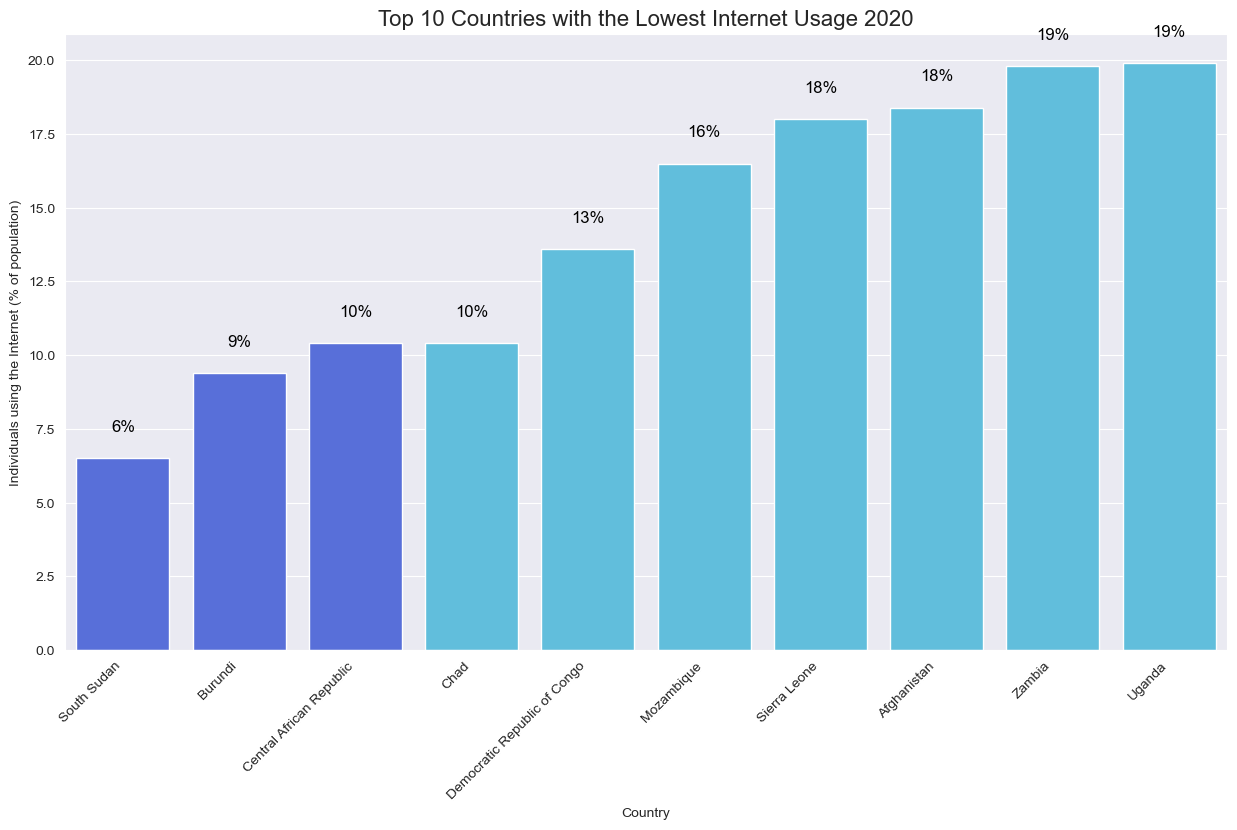

In [176]:
plot_bar_chart_top10(smallest_10, "Entity", "Individuals_%_of_population", "Country", "Individuals using the Internet (% of population)", "Top 10 Countries with the Lowest Internet Usage 2020")

# How many people had internet access in those countries in 2020?

In [177]:
# What are the top 5 countries with the highest internet use for each of the following regions: 'Africa Eastern and Southern', 'Africa Western and Central', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'European Union'?

In [178]:
Africa_Eastern_and_Southern = ['Burundi','Comoros','Djibouti','Eritrea','Ethiopia','Kenya','Madagascar','Mozambique','Malawi','Mauritius','Rwanda','Seychelles','Somalia','South Sudan','Tanzania','Uganda','Zambia','Zimbabwe','Botswana','Eswatini','Lesotho','Namibia','South Africa']

Africa_Western_and_Central = ['Angola','Cameroon','Central African Republic','Chad','Congo','DR Congo','Equatorial Guinea','Gabon','Sao Tome and Principe','Benin','Burkina Faso','Cabo Verde','Gambia','Ghana','Guinea','Guinea Bissau','Ivory Coast','Liberia','Mali','Mauritania','Niger','Nigeria','Senegal','Sierra Leone','Togo']

Latin_America_and_Caribbean = ['Argentina','Aruba','Belize','Bolivia','Brazil','Chile','Colombia','Costa Rica','Cuba','Curaçao','Dominican Republic','Ecuador','Salvador','Falkland Islands','French Guiana','Guatemala','Guyana','Haiti','Honduras','Mexico','Nicaragua','Panama','Paraguay','Peru','Saint Martin','Sint Maarten','South Georgia and the South Sandwich Islands','Suriname','Trinidad and Tobago','Uruguay','Venezuela']

East_Asia_and_Pacific = ['China', 'Japan', 'South Korea', 'North Korea', 'Taiwan', 'Hong Kong', 'Mongolia', 'Macao', 'American Samoa', 'Australia', 'Cook Islands', 'Fiji', 'French Polynesia', 'Guam', 'Kiribati', 'Marshall Islands', 'Micronesia (country)', 'Nauru', 'New Caledonia', 'New Zealand', 'Niue', 'Northern Mariana Islands', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']

European_Union = ['Austria', 'France', 'Malta', 'Belgium', 'Germany', 'Netherlands', 'Bulgaria', 'Greece', 'Poland', 'Croatia', 'Hungary', 'Portugal', 'Cyprus', 'Ireland', 'Romania', 'Czech Republic', 'Italy', 'Slovakia', 'Denmark', 'Latvia', 'Slovenia', 'Estonia', 'Lithuania', 'Spain', 'Finland', 'Luxembourg', 'Sweden']

North_America = ['United States', 'Mexico', 'Canada', 'Guatemala', 'Haiti', 'Dominican Republic', 'Cuba', 'Honduras', 'Nicaragua', 'El Salvador', 'Costa Rica', 'Panama', 'Jamaica', 'Trinidad and Tobago', 'Bahamas', 'Belize', 'Barbados', 'Saint Lucia', 'Grenada', 'Saint Vincent and the Grenadines', 'Antigua and Barbuda', 'Dominica', 'Saint Kitts and Nevis']


In [179]:
results = len(Africa_Eastern_and_Southern) + len(Africa_Western_and_Central) + len(Latin_America_and_Caribbean) + len(East_Asia_and_Pacific) + len(European_Union) + len(North_America)
print(len(East_Asia_and_Pacific))

29


In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



def usage_internet(regions_, df, entity, x, y, title):
    """
    Plot internet usage for countries in a given list.

    Parameters:
    - list_: list of countries to include in the plot
    - df: dataframe containing the data to plot
    - col: name of the column containing country names in the dataframe
    - x: name of the column containing the x-axis data
    - y: name of the column containing the y-axis data
    - title: title of the plot

    Returns: None (displays plot)

    """

    # Filter the dataframe to only include data for countries in the given list
    data = df[df[entity].isin(regions_)]
    
    # Get the top 5 countries based on the y-axis data
    top_5 = data.groupby(entity)[y].sum().nlargest(5).index.tolist()
    data = data[data[entity].isin(top_5)]
    
    # Order hue by the sum of y-axis data for each country
    hue_order = data.groupby(entity)[y].sum().sort_values(ascending=False).index.tolist()
    
    # Create the plot
    plt.figure(figsize=(15, 7))
    sns.lineplot(data=data, hue=entity, hue_order=hue_order, x=x, y=y)
    plt.title(title, fontsize=15)
    plt.xticks(range(1990, 2022, 2), rotation = 75, fontsize = 12)
    plt.show()




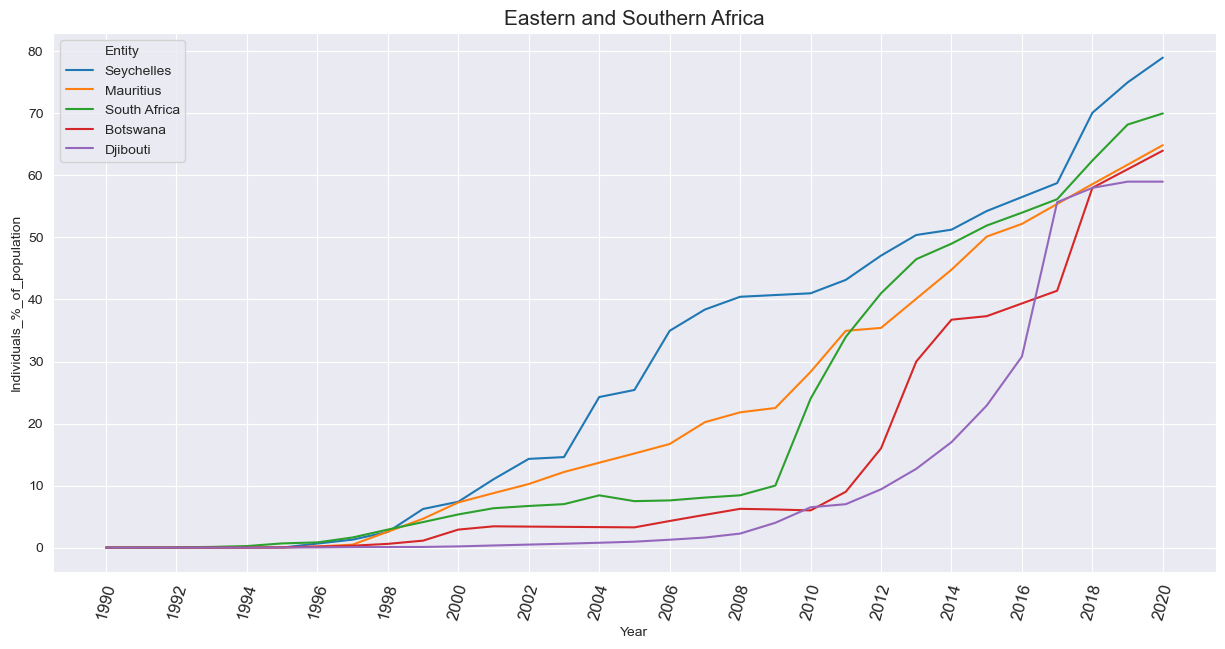

In [181]:
usage_internet(Africa_Eastern_and_Southern, percentage_of_users, 'Entity', 'Year', 'Individuals_%_of_population', 'Eastern and Southern Africa')

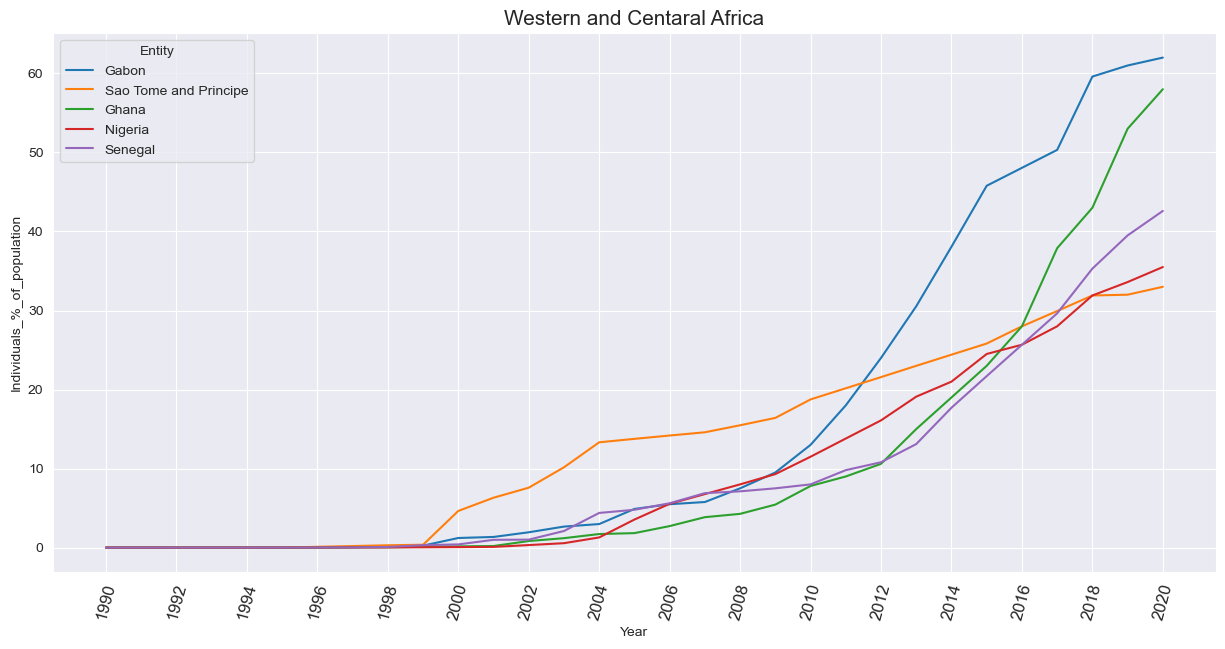

In [182]:
usage_internet(Africa_Western_and_Central, percentage_of_users, 'Entity', 'Year', 'Individuals_%_of_population', 'Western and Centaral Africa')

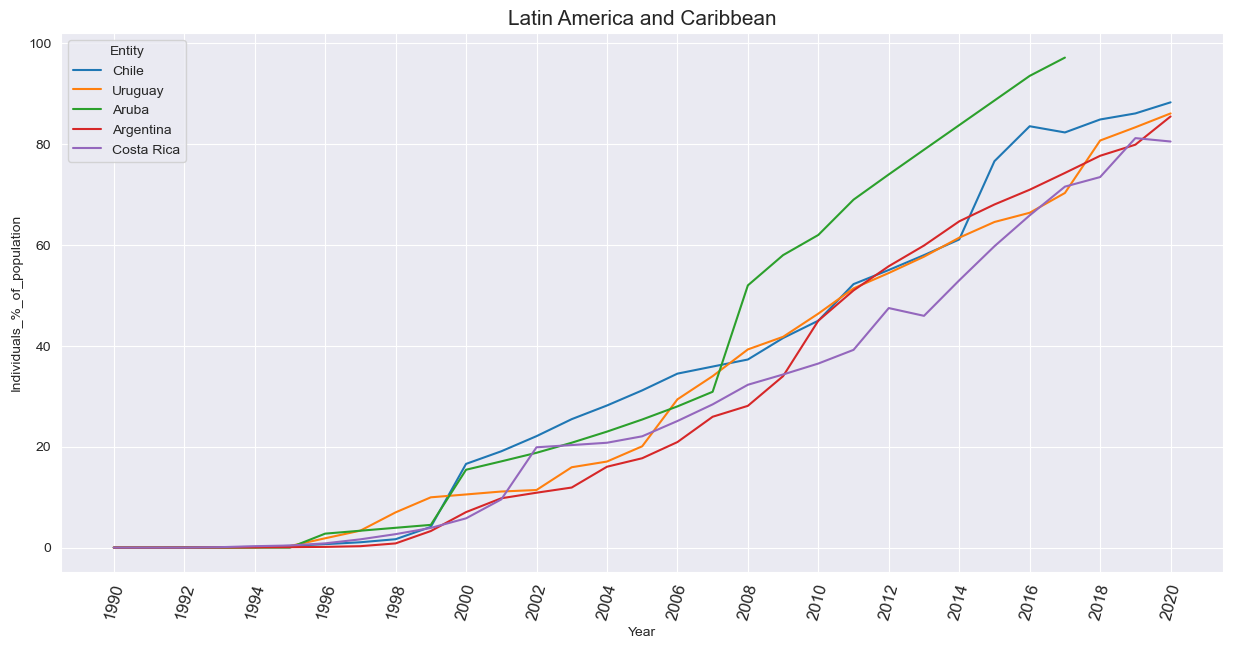

In [183]:
usage_internet(Latin_America_and_Caribbean, percentage_of_users, 'Entity', 'Year', 'Individuals_%_of_population', 'Latin America and Caribbean')

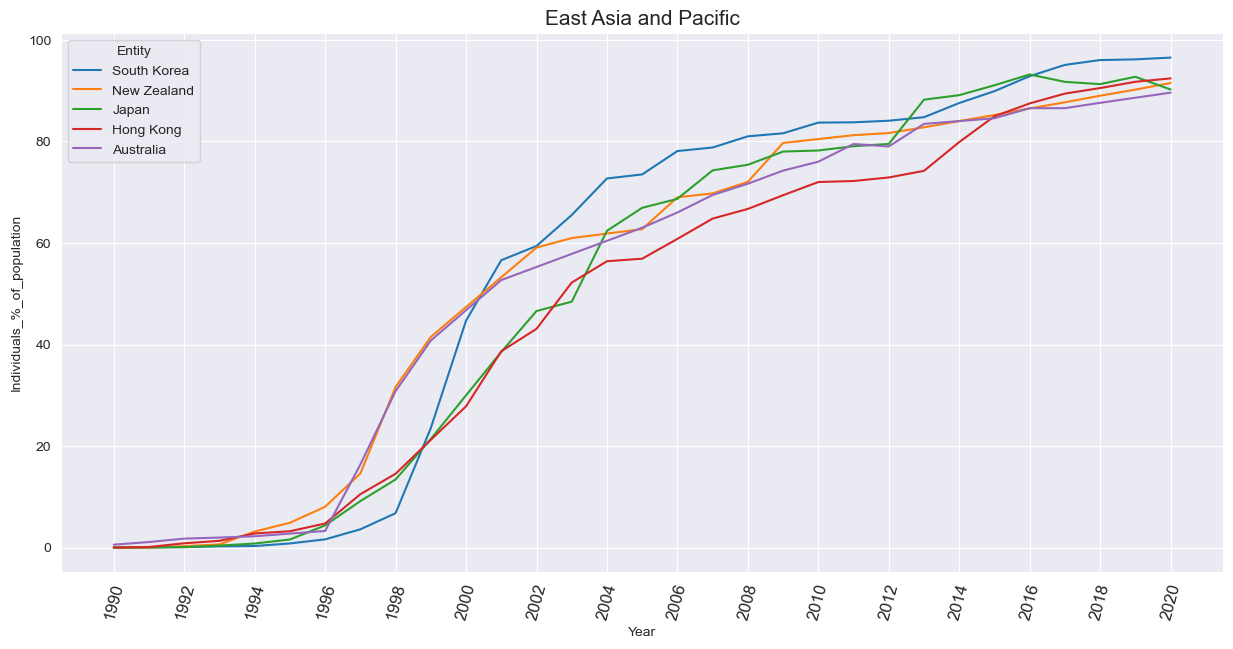

In [184]:
usage_internet(East_Asia_and_Pacific, percentage_of_users, 'Entity', 'Year', 'Individuals_%_of_population', 'East Asia and Pacific')

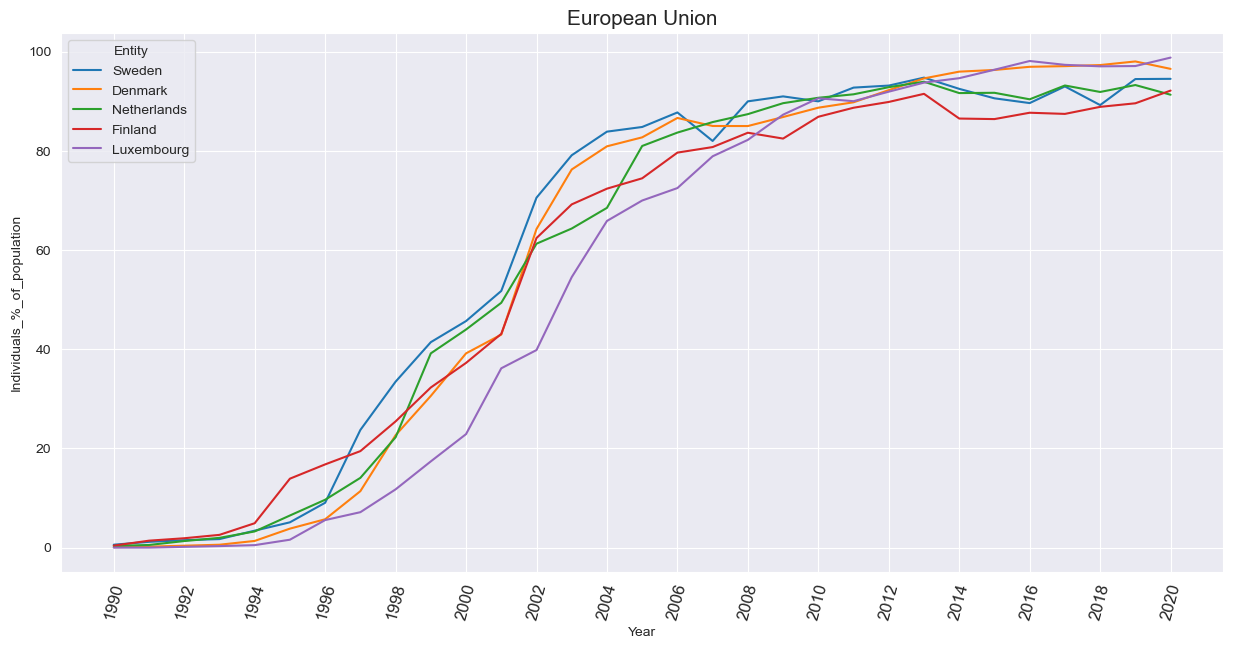

In [185]:
usage_internet(European_Union, percentage_of_users, 'Entity', 'Year', 'Individuals_%_of_population', 'European Union')

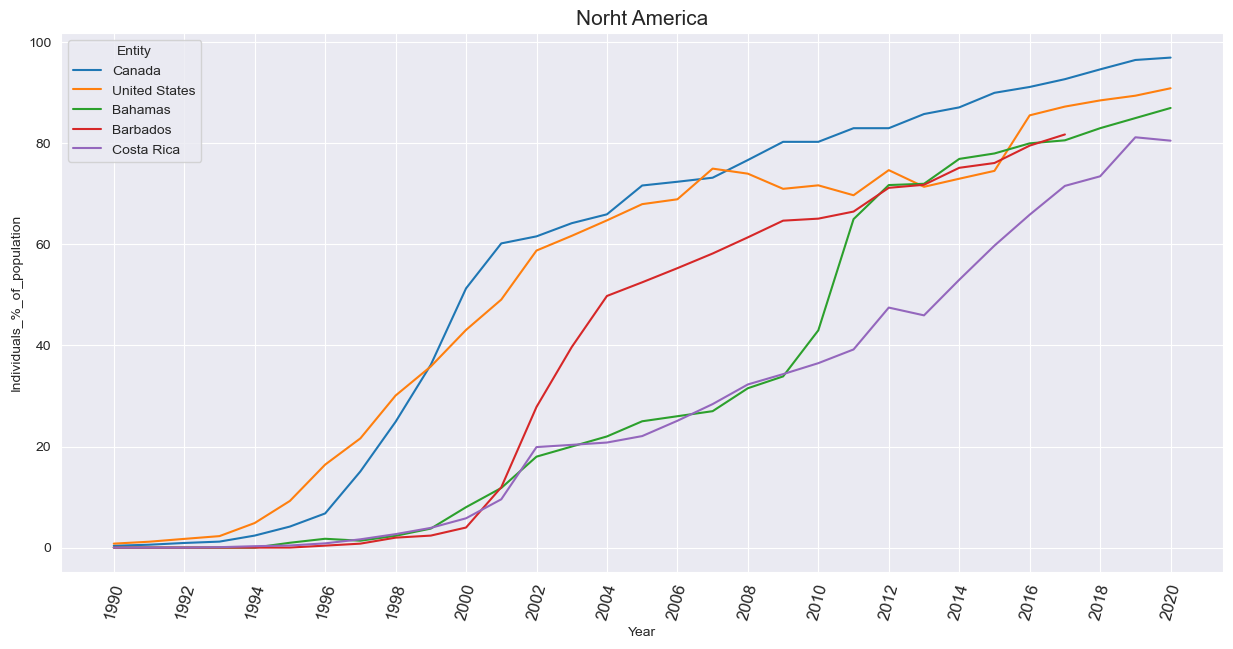

In [186]:
usage_internet(North_America, percentage_of_users, 'Entity', 'Year', 'Individuals_%_of_population', 'Norht America')

# What are the 10 countries with the most internet users?

In [187]:
users_df = users.dropna()

In [188]:
users_2020 = users_df[(users_df['Year'] == 2020) & (users_df['Entity'] != 'World')]

In [189]:
top10_internet_users = users_2020.nlargest(10, "Number_of_users")[["Entity", "Number_of_users"]]

In [190]:
top10_internet_users

,Entity,Number_of_users
1231,China,1003218650
2699,India,600446441
6049,United States,305371298
834,Brazil,173419624
2730,Indonesia,146059763
4791,Russia,123766963
2939,Japan,112995146
3771,Mexico,90678697
1717,Egypt,77282687
2191,Germany,74840220


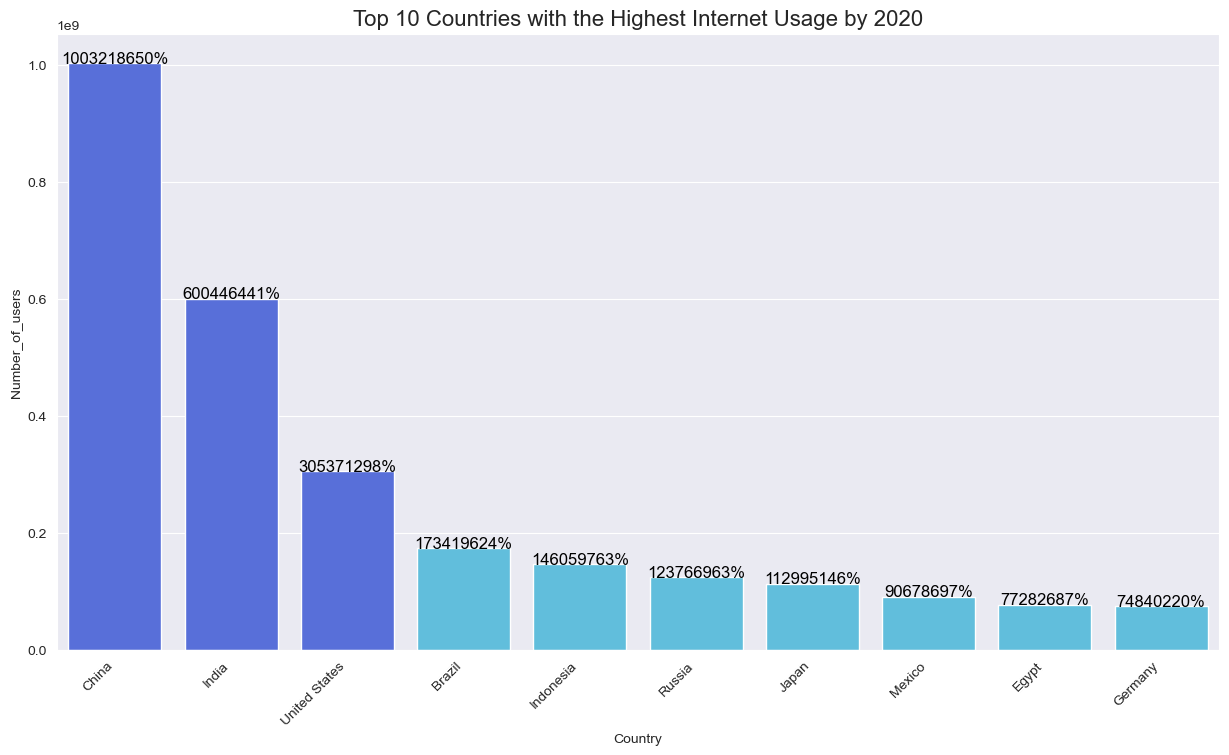

In [191]:
plot_bar_chart_top10(top10_internet_users, "Entity", "Number_of_users", "Country", "Number_of_users", "Top 10 Countries with the Highest Internet Usage by 2020")

In [192]:
!pip install geopandas

In [193]:
geo_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [194]:
merged = geo_data.merge(users, left_on='iso_a3', right_on='Code', how='left')
merged

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Entity,Code,Year,Number_of_users
0,889953,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,FJI,1990,0
1,889953,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,FJI,1991,0
2,889953,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,FJI,1992,0
3,889953,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,FJI,1993,53
4,889953,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,FJI,1994,63
...,...,...,...,...,...,...,...,...,...,...
4991,11062113,Africa,S. Sudan,SSD,11998,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",South Sudan,SSD,2016,387314
4992,11062113,Africa,S. Sudan,SSD,11998,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",South Sudan,SSD,2017,436987
4993,11062113,Africa,S. Sudan,SSD,11998,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",South Sudan,SSD,2018,498976
4994,11062113,Africa,S. Sudan,SSD,11998,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",South Sudan,SSD,2019,585070


In [195]:
merged.dtypes

pop_est             float64
continent            object
name                 object
iso_a3               object
gdp_md_est            int64
geometry           geometry
Entity               object
Code                 object
Year                float64
Number_of_users     float64
dtype: object

In [196]:
merged['Year'] = pd.to_datetime(merged['Year'], format='%Y')
merged['Number_of_users'] = merged['Number_of_users'].astype(float)


In [197]:
merged.dtypes

pop_est                   float64
continent                  object
name                       object
iso_a3                     object
gdp_md_est                  int64
geometry                 geometry
Entity                     object
Code                       object
Year               datetime64[ns]
Number_of_users           float64
dtype: object

In [198]:
!pip install mapclassify

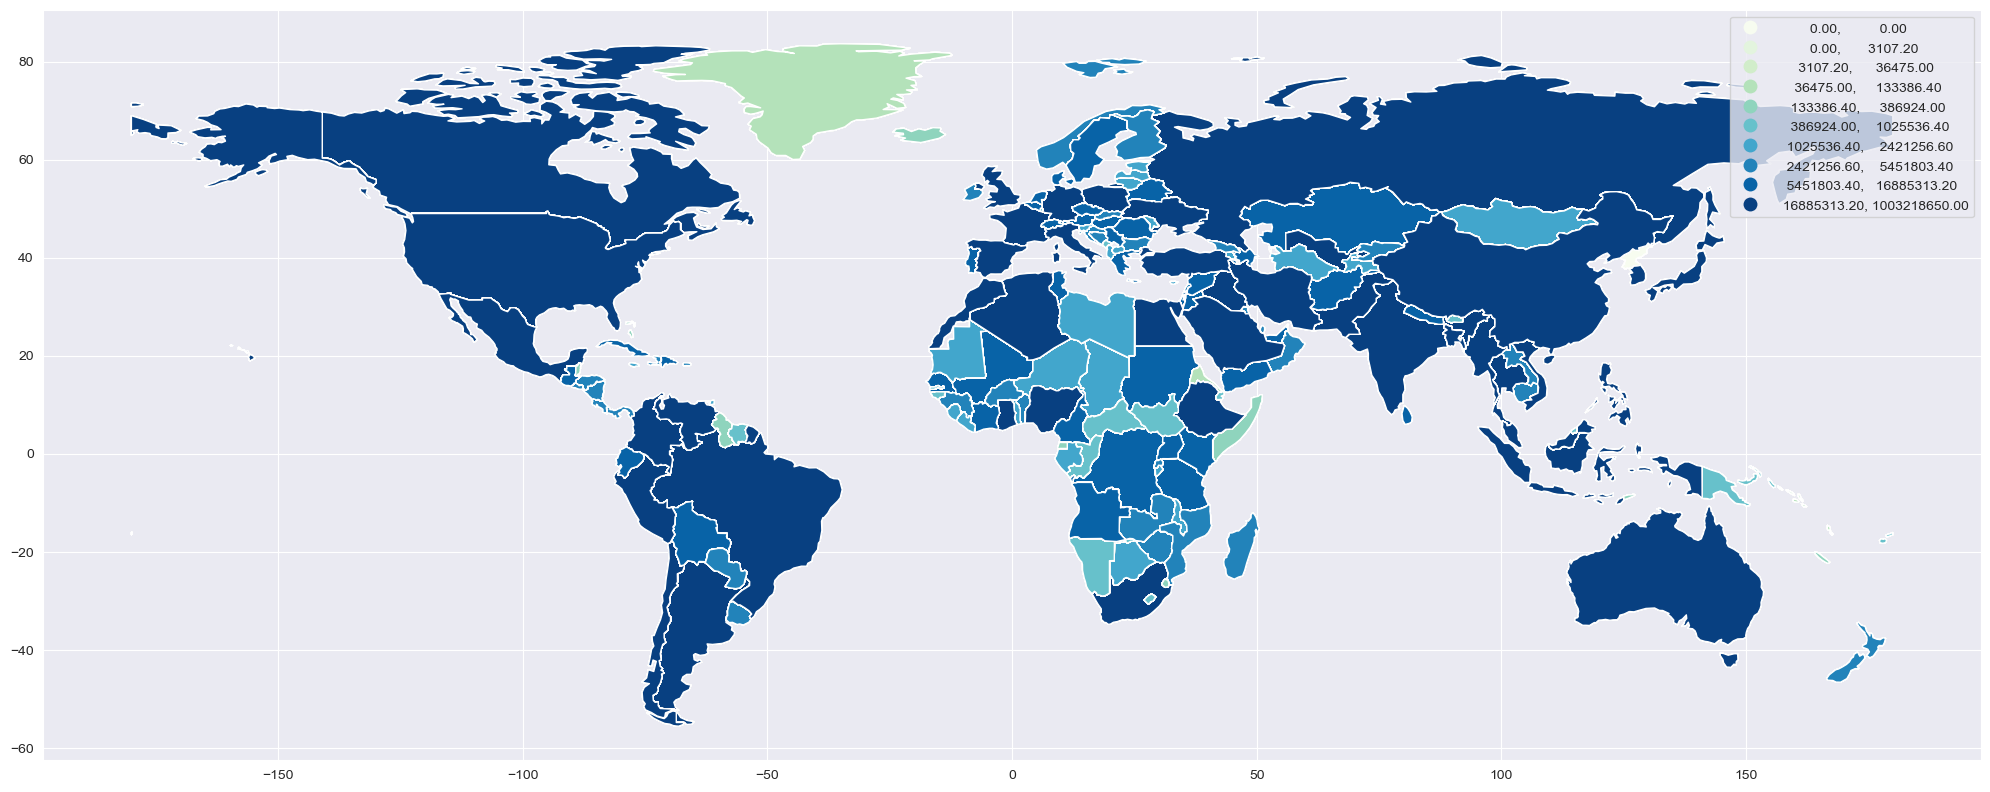

In [199]:
# Create a plot of the number of users
fig, ax = plt.subplots(figsize=(25, 25), subplot_kw=dict(aspect='equal'))

merged.plot(column='Number_of_users', scheme='Quantiles', k=10, ax=ax, legend=True, cmap='GnBu')
plt.show()

In [200]:
!pip install --upgrade mplleaflet